Importing Libreries

In [1]:
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns

Data Preprocessing 

In [2]:
#Training image preprocessing 
training_set = tf.keras.utils.image_dataset_from_directory(
    '../Plant Disease data/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    format="tf",
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [3]:
#Validation image procsssing 

validation_set = tf.keras.utils.image_dataset_from_directory(
    '../Plant Disease data/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    format="tf",
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set: 
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[ 82.25  74.75  87.25]
   [158.25 150.25 163.25]
   [159.75 151.75 164.75]
   ...
   [148.   137.   151.  ]
   [140.75 129.75 143.75]
   [156.75 145.75 159.75]]

  [[ 79.5   73.5   84.5 ]
   [159.   151.   164.  ]
   [162.25 154.25 167.25]
   ...
   [157.25 146.25 160.25]
   [128.5  117.5  131.5 ]
   [158.5  147.5  161.5 ]]

  [[ 78.75  72.75  83.75]
   [157.   149.   162.  ]
   [159.5  151.5  164.5 ]
   ...
   [155.25 144.25 158.25]
   [130.25 119.25 133.25]
   [117.75 106.75 120.75]]

  ...

  [[ 76.25  66.75  78.25]
   [144.   132.   146.  ]
   [143.   131.   145.  ]
   ...
   [137.5  125.5  135.5 ]
   [121.25 109.25 119.25]
   [125.   113.   123.  ]]

  [[ 76.25  66.5   78.25]
   [140.   128.   142.  ]
   [138.75 126.75 140.75]
   ...
   [115.75 103.75 113.75]
   [112.75 100.75 110.75]
   [123.5  111.5  121.5 ]]

  [[ 74.25  64.75  76.25]
   [135.25 123.25 137.25]
   [135.   123.   137.  ]
   ...
   [131.   119.   129.  ]
   [116.   104.   114.  ]
   [120.75 108.75 11

Model Building

To avoid overshooting 
1. Choose small Learnig rate default 0.001 we are taking 0.0001
1. There may be chance of underfitting, so increase number of neuron 
3. Add more convolution layer to extract more feature from images there may be posibility that module unable to capture relevant feature or module is confusing due to lack of feature so feed with more feature


In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential() 

In [8]:
#Building Convolution Layers 

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape = [128, 128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

C:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#Building Convolution Layers 

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
#Building Convolution Layers 

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
#Building Convolution Layers 

model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
#Building Convolution Layers 

model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500, activation='relu'))

In [16]:
model.add(Dropout(0.4)) #To avoid overfitting 

In [17]:
#Output Layer
model.add(Dense(units=38, activation='softmax'))

Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4222s 2s/step - accuracy: 0.5574 - loss: 1.5106 - val_accuracy: 0.8227 - val_loss: 0.5553
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3765s 2s/step - accuracy: 0.8447 - loss: 0.4879 - val_accuracy: 0.8995 - val_loss: 0.3118
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3249s 1s/step - accuracy: 0.9112 - loss: 0.2764 - val_accuracy: 0.9032 - val_loss: 0.3055
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3116s 1s/step - accuracy: 0.9365 - loss: 0.1922 - val_accuracy: 0.9479 - val_loss: 0.1575
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3815s 2s/step - accuracy: 0.9552 - loss: 0.1370 - val_accuracy: 0.9286 - val_loss: 0.2317
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4208s 2s/step - accuracy: 0.9636 - loss: 0.1121 - val_accuracy: 0.9486 - val_loss: 0.1637
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3422s 2s/step - accuracy: 0.9709 - loss: 0.0913 - val_accuracy: 0.9544 - val_loss: 0.1473
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3930s 2s/step - accuracy: 0.9756 -

#Model Evaluation

In [21]:
#Model Evaluation on Training Set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 866s 394ms/step - accuracy: 0.9941 - loss: 0.0209 


In [22]:
print(train_loss, train_acc)

0.02087455987930298 0.9940678477287292


In [23]:
#Model Evaluation on Validation set 
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 213s 387ms/step - accuracy: 0.9709 - loss: 0.0967


In [24]:
print(val_loss, val_acc)

0.0966770276427269 0.970919668674469


Saving Model

In [25]:
model.save("trained_model.keras")

In [26]:
training_history.history

{'accuracy': [0.5573796033859253,
  0.8447400331497192,
  0.9111743569374084,
  0.9365246295928955,
  0.9551746249198914,
  0.9636104702949524,
  0.9709083437919617,
  0.9756170511245728,
  0.9787182807922363,
  0.9817199110984802],
 'loss': [1.5106018781661987,
  0.4878540337085724,
  0.2764022946357727,
  0.19221723079681396,
  0.13700149953365326,
  0.11206387728452682,
  0.09134424477815628,
  0.07474959641695023,
  0.06528767198324203,
  0.0552075132727623],
 'val_accuracy': [0.8227293491363525,
  0.8994991779327393,
  0.9031982421875,
  0.9478716254234314,
  0.9286364912986755,
  0.948554515838623,
  0.9544160962104797,
  0.9618142247200012,
  0.9586842656135559,
  0.970919668674469],
 'val_loss': [0.5552581548690796,
  0.3117753267288208,
  0.3055339455604553,
  0.15747542679309845,
  0.2316816747188568,
  0.16366428136825562,
  0.14730171859264374,
  0.12783052027225494,
  0.13788197934627533,
  0.0966770201921463]}

In [27]:
#Recording History on JSON 
import json 
with open("training_hist.json", "w") as f: 
    json.dump(training_history.history, f)

Accuracy Visualization 

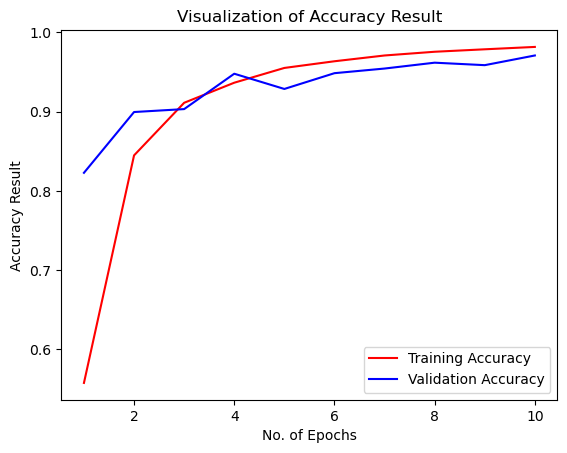

In [29]:
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')

plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()
